In [3]:
import matplotlib.pylab as plt 
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge

# 1. Loss functions

Lets focus on linear regression of the form 

$\mathbf{y} \approx f(\mathbf{X}) = \mathbf{X}\mathbf{w_1} + \mathbf{w_0}.$


#### 1.1 What are the rows of $\mathbf{X}$?

The rows of X corresponds to the m observations that describe the system.

#### 1.2 What are the columns of $\mathbf{X}$?

The columns of X corresponds to the n features that describe the system.

Often, we write the equation above as

$\mathbf{y} \approx \mathbf{\tilde{X}}\mathbf{w}$

#### 1.3 How does $\mathbf{\tilde{X}}$ look like in this case (i.e., how does the shape of the matrix change compared to $\mathbf{X}$)? (1 point)

the dimension of the matrix change : 2 columns and m number of rows. The matrix has now 2 features and m observations.

For machine learning, we need a cost function. Two common choices are the mean-squared error (MSE, $\mathcal{L}_2$), and the mean-absolute error (MAE, $\mathcal{L}_1$)

\begin{align}
    \mathcal{L}_2 &=& \frac{1}{2N} \sum_{i=1}^N \left(y_i - f(x_i) \right)^2 \\
    \mathcal{L}_1 &=& \frac{1}{2N} \sum_{i=1}^N \left|y_i - f(x_i) \right| 
\end{align}

#### 1.5 In the Jupyter notebook, write a Python function that computes these two cost functions given an error term $\boldsymbol{\epsilon} = \mathbf{y} - \mathbf{\tilde{X}}\mathbf{w}$ (2 points)

In [ ]:
def mean_squared_error(error_vector):
    mean_squared_error = # fill your code
    return mean_squared_error

In [ ]:
def mean_absolute_error(error_vector):
    mean_absolute_error = # fill your code
    return mean_absolute_error

Your code should run as follows

```python
mean_squared_error(np.array([0,0,0]))
> returns 0
```

```python
mean_squared_error(np.array([1,1,1]))
> returns 1
```

#### 1.6 What is the shape of these cost functions as a function of the error  (1 point)

In [ ]:
x_axis = np.linspace(-10,10,100) # change as you wish for your plot
y_mae = [mean_absolute_error(x) for x in x_axis]
y_mse = [mean_squared_error(x) for x in x_axis]

In [ ]:
plt.plot(x_axis, y_mse, label='MSE')
plt.plot(x_axis, y_mae, label='MAE')
plt.xlabel('error term')
plt.ylabel('cost function')

#### 1.7  Are both loss functions differentiable for all $\boldsymbol{\epsilon}$? (1 point) What implications does this have for gradient based optimization like gradient descent? (1 point)

__< Your answer >__

#### 1.8 Which loss function is more sensitive to outliers (1 point) and why (1 point)?

__< Your answer >__

# 2. Regularization

Assume that the columns of $\mathbf{X}$ are linearly independent.
As a refresher of linear algebra, recall when the linear system $\mathbf{X}\mathbf{w} = \mathbf{y}$ has

#### 2.1 One unique solution (1 point)

yes

#### 2.2 No solution (1 point)

no

#### 2.3 An infinite number of solutions (1 point)

0

To calculate the weights, $\mathbf{w}$ we have to solve
\begin{equation}
    \mathbf{w} = \left(\mathbf{\tilde{X}}\mathbf{\tilde{X}}^T\right)^{-1}\mathbf{\tilde{X}}^T\mathbf{y}
\end{equation}

#### 2.5 In general, why can't we solve eq.~\ref{eq:linear_reg} using $\mathbf{y} = \tilde{\mathbf{X}}^{-1}\textbf{w}$? (1 point)

We don't know if the system gives us a unique solution. There might be issues with invertibility, e.g., if p > n (only square matrices are)

#### 2.5  What happens if some columns are linearly dependent? (1 point) What is the connection to feature selection? (1 point)

The number of solutions will be infinite. 

#### 2.6  What is the shape of the parabola as a function of $a$?

In [ ]:
def parabola(x, a = 1): 
    return a * x ** 2

In [ ]:
x_axis_parabola = np.linspace(-10, 10, 100)

In [ ]:
plt.plot(x_axis_parabola, parabola(x_axis_parabola))

In [ ]:
def parabola(x, a = -1): 
    return a * x ** 2
x_axis_parabola = np.linspace(-10, 10, 100)
plt.plot(x_axis_parabola, parabola(x_axis_parabola))

According to the sign of a, the shape of the parbola will change. If a is positive, the parabola faces upwards whereas for a negative, the parabola faces downwards.

#### 2.7 Plot the approximation to the function for different order polynomials ($N \in \{1, 2, 16\}$) and with different regularization strength ($\lambda \in \{0, 10^{-3}, 10^{-2}, 1\}$). What do you observe 

In [4]:
def true_function(X):
    return np.cos(1.5 * np.pi * X)

In [5]:
X_test = np.linspace(0, 1, 100) # some grid for us on the x axis

In [6]:
n_samples = 10 # the number of points we will sample from true_function
degrees = [1, 2, 16] # the polynomial degrees we will test

X = np.sort(np.random.rand(n_samples))
y = true_function(X) + np.random.randn(n_samples) * 0.1 # add some scaled random noise

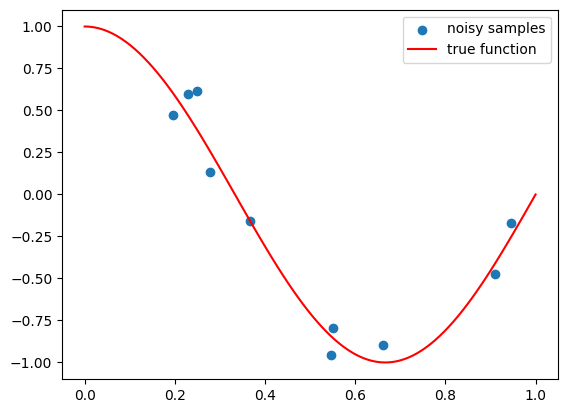

In [7]:
plt.scatter(X, y, label='noisy samples')
plt.plot(X_test, true_function(X_test), c='r', label='true function')
plt.legend()

The following code will fit a polynomial regression, you need to fill the degree

**for degree N=1**

In [8]:
polynomial_features = PolynomialFeatures(degree=1,
                                             include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                     ("linear_regression", linear_regression)])
pipeline.fit(X[:, np.newaxis], y)

Pipeline(steps=[('polynomial_features',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('linear_regression', LinearRegression())])

To plot the result, you can use the following code

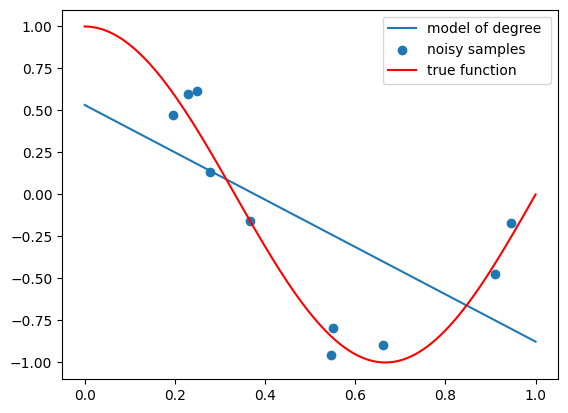

In [9]:
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="model of degree ")
plt.scatter(X, y, label='noisy samples')
plt.plot(X_test, true_function(X_test), c='r', label='true function')
plt.legend()

Next, we can investigate the effect of the regularization parameter $\lambda$ (function parameter `alpha`), For this, you can use the following code 

**alpha=0**

In [10]:
polynomial_features = PolynomialFeatures(degree=1,
                                             include_bias=False)
ridge_regression = Ridge(alpha=0)
pipeline_ridge = Pipeline([("polynomial_features", polynomial_features),
                     ("ridge_regression", ridge_regression)])
pipeline_ridge.fit(X[:, np.newaxis], y)



Pipeline(steps=[('polynomial_features',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('ridge_regression', Ridge(alpha=0))])

For plotting you can reuse the following code

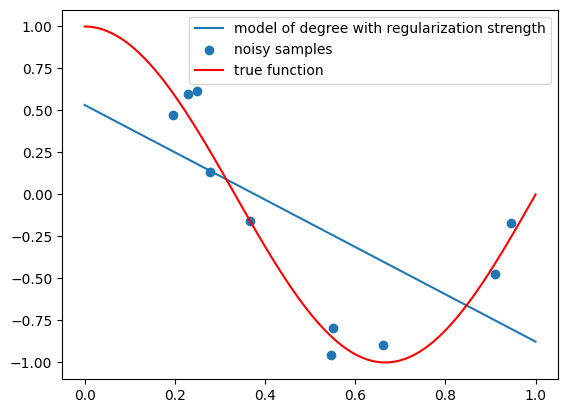

In [12]:
plt.plot(X_test, pipeline_ridge.predict(X_test[:, np.newaxis]), label="model of degree with regularization strength")
plt.scatter(X, y, label='noisy samples')
plt.plot(X_test, true_function(X_test), c='r', label='true function')
plt.legend()

**alpha=10-3**

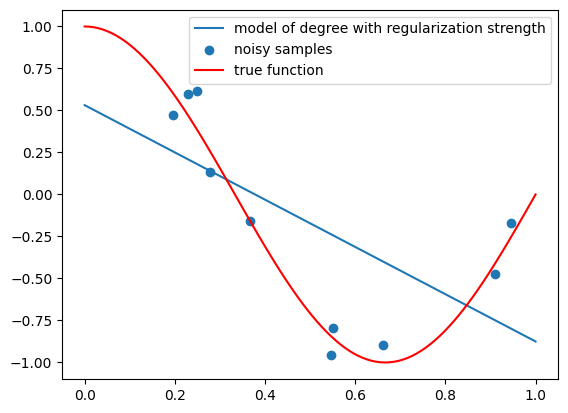

In [14]:
polynomial_features = PolynomialFeatures(degree=1,
                                             include_bias=False)
ridge_regression = Ridge(alpha=0.001)
pipeline_ridge = Pipeline([("polynomial_features", polynomial_features),
                     ("ridge_regression", ridge_regression)])
pipeline_ridge.fit(X[:, np.newaxis], y)
plt.plot(X_test, pipeline_ridge.predict(X_test[:, np.newaxis]), label="model of degree with regularization strength")
plt.scatter(X, y, label='noisy samples')
plt.plot(X_test, true_function(X_test), c='r', label='true function')
plt.legend()

**alpha=0.01**

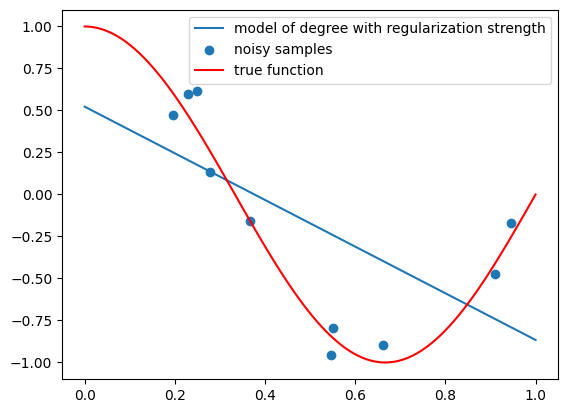

In [15]:
polynomial_features = PolynomialFeatures(degree=1,
                                             include_bias=False)
ridge_regression = Ridge(alpha=0.01)
pipeline_ridge = Pipeline([("polynomial_features", polynomial_features),
                     ("ridge_regression", ridge_regression)])
pipeline_ridge.fit(X[:, np.newaxis], y)
plt.plot(X_test, pipeline_ridge.predict(X_test[:, np.newaxis]), label="model of degree with regularization strength")
plt.scatter(X, y, label='noisy samples')
plt.plot(X_test, true_function(X_test), c='r', label='true function')
plt.legend()

**alpha=1**

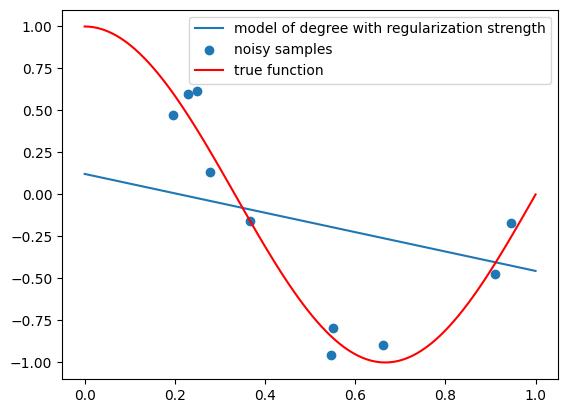

In [16]:
polynomial_features = PolynomialFeatures(degree=1,
                                             include_bias=False)
ridge_regression = Ridge(alpha=1)
pipeline_ridge = Pipeline([("polynomial_features", polynomial_features),
                     ("ridge_regression", ridge_regression)])
pipeline_ridge.fit(X[:, np.newaxis], y)
plt.plot(X_test, pipeline_ridge.predict(X_test[:, np.newaxis]), label="model of degree with regularization strength")
plt.scatter(X, y, label='noisy samples')
plt.plot(X_test, true_function(X_test), c='r', label='true function')
plt.legend()

**for degree N=2**

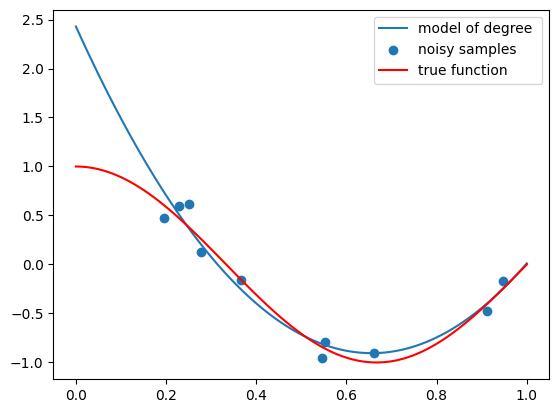

In [17]:
polynomial_features = PolynomialFeatures(degree=2,
                                             include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                     ("linear_regression", linear_regression)])
pipeline.fit(X[:, np.newaxis], y)
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="model of degree ")
plt.scatter(X, y, label='noisy samples')
plt.plot(X_test, true_function(X_test), c='r', label='true function')
plt.legend()

**alpha=0**

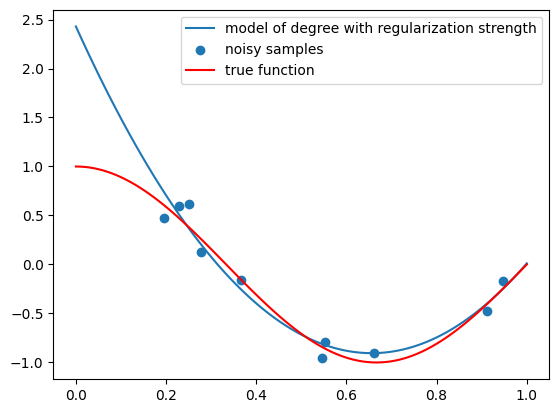

In [18]:
polynomial_features = PolynomialFeatures(degree=2,
                                             include_bias=False)
ridge_regression = Ridge(alpha=0)
pipeline_ridge = Pipeline([("polynomial_features", polynomial_features),
                     ("ridge_regression", ridge_regression)])
pipeline_ridge.fit(X[:, np.newaxis], y)
plt.plot(X_test, pipeline_ridge.predict(X_test[:, np.newaxis]), label="model of degree with regularization strength")
plt.scatter(X, y, label='noisy samples')
plt.plot(X_test, true_function(X_test), c='r', label='true function')
plt.legend()

**alpha=0.001**

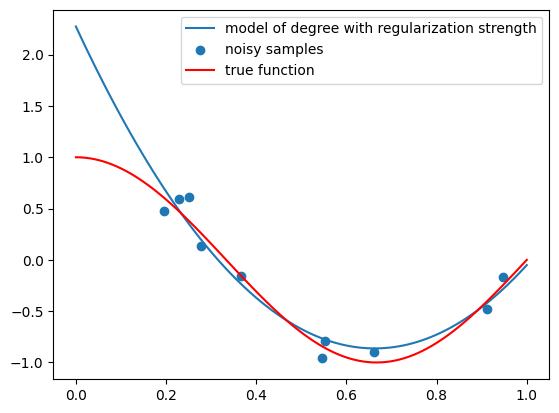

In [19]:
polynomial_features = PolynomialFeatures(degree=2,
                                             include_bias=False)
ridge_regression = Ridge(alpha=0.001)
pipeline_ridge = Pipeline([("polynomial_features", polynomial_features),
                     ("ridge_regression", ridge_regression)])
pipeline_ridge.fit(X[:, np.newaxis], y)
plt.plot(X_test, pipeline_ridge.predict(X_test[:, np.newaxis]), label="model of degree with regularization strength")
plt.scatter(X, y, label='noisy samples')
plt.plot(X_test, true_function(X_test), c='r', label='true function')
plt.legend()

**alpha=0.01**

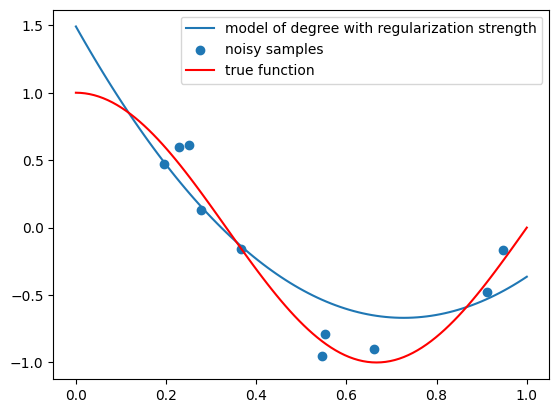

In [20]:
polynomial_features = PolynomialFeatures(degree=2,
                                             include_bias=False)
ridge_regression = Ridge(alpha=0.01)
pipeline_ridge = Pipeline([("polynomial_features", polynomial_features),
                     ("ridge_regression", ridge_regression)])
pipeline_ridge.fit(X[:, np.newaxis], y)
plt.plot(X_test, pipeline_ridge.predict(X_test[:, np.newaxis]), label="model of degree with regularization strength")
plt.scatter(X, y, label='noisy samples')
plt.plot(X_test, true_function(X_test), c='r', label='true function')
plt.legend()

**alpha=1**

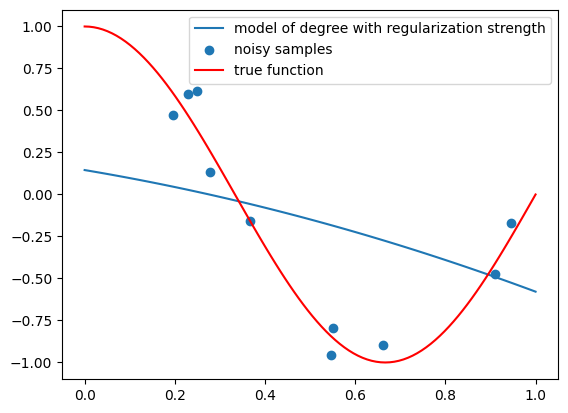

In [21]:
polynomial_features = PolynomialFeatures(degree=2,
                                             include_bias=False)
ridge_regression = Ridge(alpha=1)
pipeline_ridge = Pipeline([("polynomial_features", polynomial_features),
                     ("ridge_regression", ridge_regression)])
pipeline_ridge.fit(X[:, np.newaxis], y)
plt.plot(X_test, pipeline_ridge.predict(X_test[:, np.newaxis]), label="model of degree with regularization strength")
plt.scatter(X, y, label='noisy samples')
plt.plot(X_test, true_function(X_test), c='r', label='true function')
plt.legend()

**for degree N=16**

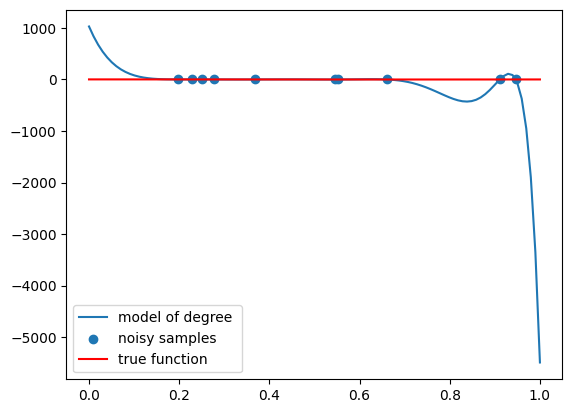

In [29]:
polynomial_features = PolynomialFeatures(degree=16,
                                             include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                     ("linear_regression", linear_regression)])
pipeline.fit(X[:, np.newaxis], y)
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="model of degree ")
plt.scatter(X, y, label='noisy samples')
plt.plot(X_test, true_function(X_test), c='r', label='true function')
plt.legend()

**alpha=0**

C:\Users\aurel\miniconda3\envs\model\lib\site-packages\sklearn\linear_model\_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=6.29246e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)


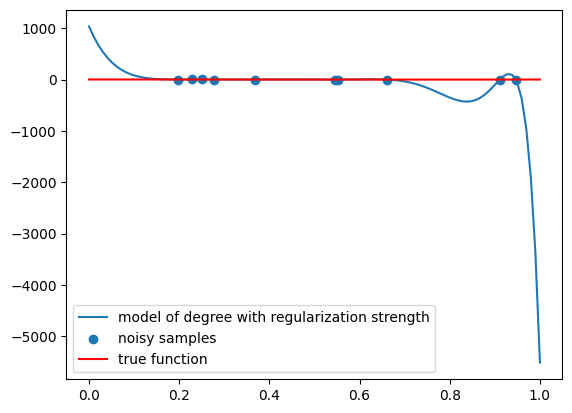

In [23]:
polynomial_features = PolynomialFeatures(degree=16,
                                             include_bias=False)
ridge_regression = Ridge(alpha=0)
pipeline_ridge = Pipeline([("polynomial_features", polynomial_features),
                     ("ridge_regression", ridge_regression)])
pipeline_ridge.fit(X[:, np.newaxis], y)
plt.plot(X_test, pipeline_ridge.predict(X_test[:, np.newaxis]), label="model of degree with regularization strength")
plt.scatter(X, y, label='noisy samples')
plt.plot(X_test, true_function(X_test), c='r', label='true function')
plt.legend()

**alpha=0.001**

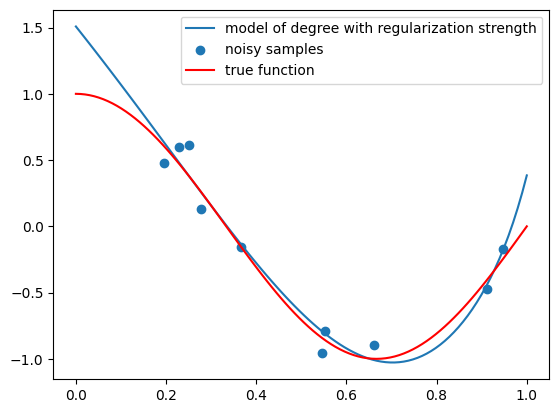

In [24]:
polynomial_features = PolynomialFeatures(degree=16,
                                             include_bias=False)
ridge_regression = Ridge(alpha=0.001)
pipeline_ridge = Pipeline([("polynomial_features", polynomial_features),
                     ("ridge_regression", ridge_regression)])
pipeline_ridge.fit(X[:, np.newaxis], y)
plt.plot(X_test, pipeline_ridge.predict(X_test[:, np.newaxis]), label="model of degree with regularization strength")
plt.scatter(X, y, label='noisy samples')
plt.plot(X_test, true_function(X_test), c='r', label='true function')
plt.legend()

**alpha=0.01**

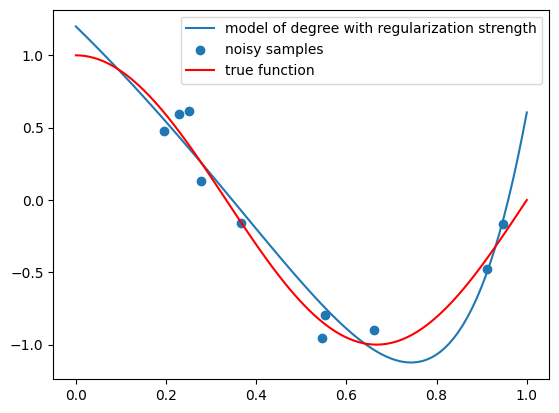

In [25]:
polynomial_features = PolynomialFeatures(degree=16,
                                             include_bias=False)
ridge_regression = Ridge(alpha=0.01)
pipeline_ridge = Pipeline([("polynomial_features", polynomial_features),
                     ("ridge_regression", ridge_regression)])
pipeline_ridge.fit(X[:, np.newaxis], y)
plt.plot(X_test, pipeline_ridge.predict(X_test[:, np.newaxis]), label="model of degree with regularization strength")
plt.scatter(X, y, label='noisy samples')
plt.plot(X_test, true_function(X_test), c='r', label='true function')
plt.legend()

**alpha=1**

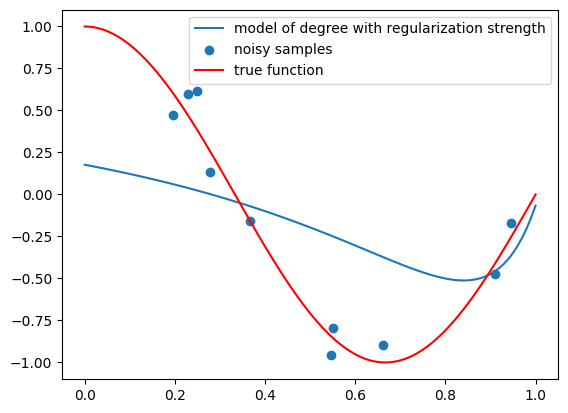

In [26]:
polynomial_features = PolynomialFeatures(degree=16,
                                             include_bias=False)
ridge_regression = Ridge(alpha=1)
pipeline_ridge = Pipeline([("polynomial_features", polynomial_features),
                     ("ridge_regression", ridge_regression)])
pipeline_ridge.fit(X[:, np.newaxis], y)
plt.plot(X_test, pipeline_ridge.predict(X_test[:, np.newaxis]), label="model of degree with regularization strength")
plt.scatter(X, y, label='noisy samples')
plt.plot(X_test, true_function(X_test), c='r', label='true function')
plt.legend()


For an order of polynomial of one, the model of degree one is definitely not good to approximate the true function because of the shape of the true function (not a linear function). This type of function doesn't explain well the data : the model is too simple to use it. If now we try to use a degree of 2, the true function is well approximated by the model for a small value of alpha, the regularization strength. The curve corresponding well to the data when the regularization strength is small. When the regularization strength increases, we see that for N=2, the curve is smoother because it passes to fewer points. For a degree polynomial of 16, the model is really complex but passes exactly to all the points. And as before, when the regularization strength increases, the more the model curve will be smooth, so the model will be less complicated but the datas are not well approximated. 

The more the regularization strength is high, the more the model compelixity is reduced, because regularization penalizes weights that are too high in the model. The more the degree of the model is big, the more the model complexitity will be and the less the curve will be smooth. 



#### 2.8 What do you observe if you change the number of samples from the function?

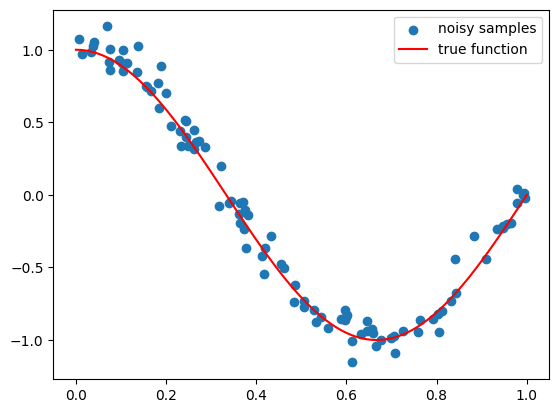

In [30]:
def true_function(X):
    return np.cos(1.5 * np.pi * X)
X_test = np.linspace(0, 1, 100) # some grid for us on the x axis
n_samples = 100 # the number of points we will sample from true_function
degrees = [1, 2, 16] # the polynomial degrees we will test

X = np.sort(np.random.rand(n_samples))
y = true_function(X) + np.random.randn(n_samples) * 0.1 # add some scaled random noise
plt.scatter(X, y, label='noisy samples')
plt.plot(X_test, true_function(X_test), c='r', label='true function')
plt.legend()

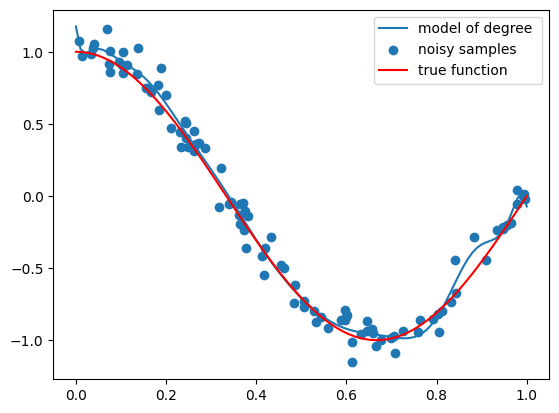

In [31]:
polynomial_features = PolynomialFeatures(degree=16,
                                             include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                     ("linear_regression", linear_regression)])
pipeline.fit(X[:, np.newaxis], y)
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="model of degree ")
plt.scatter(X, y, label='noisy samples')
plt.plot(X_test, true_function(X_test), c='r', label='true function')
plt.legend()



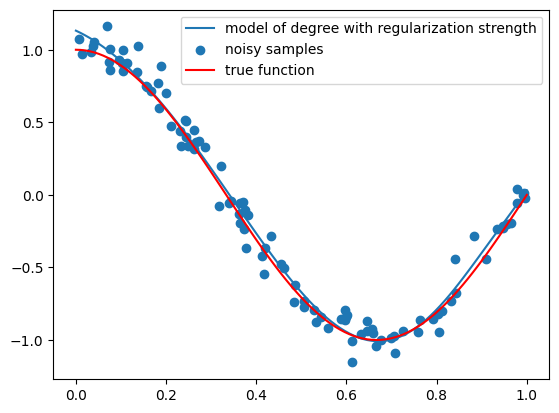

In [32]:
polynomial_features = PolynomialFeatures(degree=16,
                                             include_bias=False)
ridge_regression = Ridge(alpha=0.001)
pipeline_ridge = Pipeline([("polynomial_features", polynomial_features),
                     ("ridge_regression", ridge_regression)])
pipeline_ridge.fit(X[:, np.newaxis], y)
plt.plot(X_test, pipeline_ridge.predict(X_test[:, np.newaxis]), label="model of degree with regularization strength")
plt.scatter(X, y, label='noisy samples')
plt.plot(X_test, true_function(X_test), c='r', label='true function')
plt.legend()

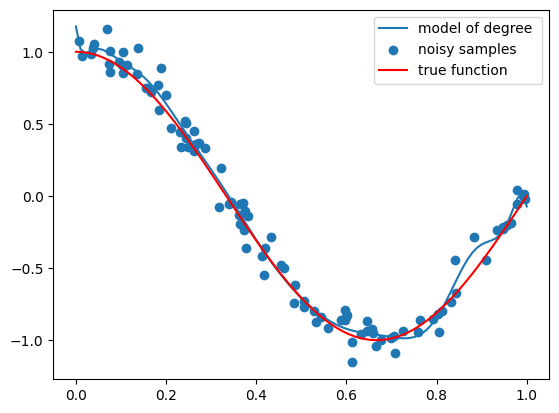

In [34]:
Polynomial_features = PolynomialFeatures(degree=2,
                                             include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                     ("linear_regression", linear_regression)])
pipeline.fit(X[:, np.newaxis], y)
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="model of degree ")
plt.scatter(X, y, label='noisy samples')
plt.plot(X_test, true_function(X_test), c='r', label='true function')
plt.legend()


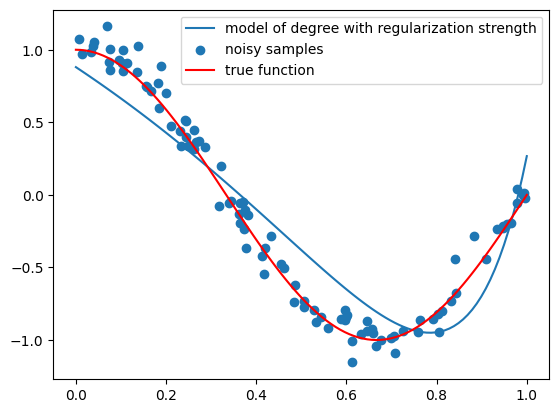

In [38]:
polynomial_features = PolynomialFeatures(degree=16,
                                             include_bias=False)
ridge_regression = Ridge(alpha=1)
pipeline_ridge = Pipeline([("polynomial_features", polynomial_features),
                     ("ridge_regression", ridge_regression)])
pipeline_ridge.fit(X[:, np.newaxis], y)
plt.plot(X_test, pipeline_ridge.predict(X_test[:, np.newaxis]), label="model of degree with regularization strength")
plt.scatter(X, y, label='noisy samples')
plt.plot(X_test, true_function(X_test), c='r', label='true function')
plt.legend()

If we increase the number of samples, let's say 100 samples, the model will give us a better approximation to the true function, we will get a better fit as we can observe by comparision with when we had 10 samples. 

#### 2.9 Why do we need a test set in machine learning? (1 point)

A test set in machine learning check the perfomances of the model. 

#### 2.10 If we need to optimize hyperparameters, do we use the test set to select the best hyperparameters? (1 point)

No, we use cross-valition method to get a score for each set of hyperparameters. We don't have access to it during the test error.